# <font color=Green>CLASSIFICATION ASSIGNMENT 2 - LIVER DISEASE DATASET</font>

indexes that follows in the order are as below:-

<font color=Green>(A) COLLECT / EXTRACT DATA

(B)	PRE-PROCESS DATA

(C)	fILTER ANALYSIS USING PEARSON'S CORRELATION

(D)	FEATURE ENGINEERING & MODEL BUILDING DIAGNOSTICS</font>




In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import seaborn as sns
from matplotlib import style
#import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from tkinter import *
from tkinter.font import Font
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tqdm import tqdm 
from math import sqrt 
from time import gmtime, strftime
%matplotlib inline

######## Capture the start time to check the runt ime of the whole notebook #########
startTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())

C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <font color=Red>(A)	COLLECT / EXTRACT DATA</font>


In [2]:
#reading data from Cancer_Dataset.csv
    
df_final_data = pd.read_csv('liver_disease_1.csv')

print("File imported and data frame created")


File imported and data frame created


In [3]:
df_final_data  # this is final data set to be pre processed.

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes
...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,No
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,Yes
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,Yes
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,Yes


In [4]:
df_final_data.dtypes # all the  ATTRIBUTES  listed here  where all are continuous variables


Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                        object
dtype: object

In [5]:
# let's have a look at how many labels each variable has

for col in df_final_data.columns:
    print(col, ': ', len(df_final_data[col].unique()), ' labels')

Age :  72  labels
Total_Bilirubin :  113  labels
Direct_Bilirubin :  80  labels
Alkaline_Phosphotase :  263  labels
Alamine_Aminotransferase :  152  labels
Aspartate_Aminotransferase :  177  labels
Total_Protiens :  58  labels
Albumin :  40  labels
Albumin_and_Globulin_Ratio :  70  labels
Dataset :  2  labels


# <font color=Red>(B)	PRE-PROCESS DATA</font>

<font color=Green>BEAFORE THE MODEL IS BUILT, IT IS ESSENTIAL TO ENSURE THE QUALITY OF THE DATA FOR ISSUES SUCH AS RELIABILITY, COMPLETENESS, USEFULLNESS, ACCURACY, MISSING DATA AND OUTLIERS.

DATA IMPUTATION TECHNIQUES MAY BE USED TO DEAL WITH MISSING DATA. USE OF DESCRIPTIVE STAT AND VISUZLAIZATION MAY BE USED TO IDENTIFY THE EXISTENCE OF OUTLIERS AND VARIABILITY IN THE DATASET. MANY NEW VARIABLES CAN BE DERIVED AND ALOS USED IN MODEL BUILDING. CATEGORICAL DATA HAS TO BE PRE-PROCESSED USING DUMMY VARIABELS, BEFORE IT IS USED TO MODEL BUILDING.
.</font>


In [6]:
df_final_data.isnull() # checking null values in data set

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
578,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,False,False


In [7]:
df_final_data.isnull().sum() 

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
######## Manage missing values and replace by mean to keep the data consistent ########

for column in df_final_data:
    if column != 'Dataset':
        print("\n mean of column: {} is {}".format(column,df_final_data[column].mean()))
        df_final_data[column].replace(np.nan, df_final_data[column].mean(), inplace = True)
print("\n\nAll misisng values if any replaced by mean")
print("\n\nIs any null value present after replacing the missing values:  ",df_final_data.isnull().values.any())
df_final_data.isnull().sum() 


 mean of column: Age is 44.74614065180103

 mean of column: Total_Bilirubin is 3.298799313893652

 mean of column: Direct_Bilirubin is 1.4861063464837074

 mean of column: Alkaline_Phosphotase is 290.57632933104634

 mean of column: Alamine_Aminotransferase is 80.71355060034305

 mean of column: Aspartate_Aminotransferase is 109.91080617495712

 mean of column: Total_Protiens is 6.483190394511151

 mean of column: Albumin is 3.14185248713551

 mean of column: Albumin_and_Globulin_Ratio is 0.9470639032815201


All misisng values if any replaced by mean


Is any null value present after replacing the missing values:   False


Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [9]:
df_final_data.duplicated() # checking duplicate data

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [10]:
df_final_data[df_final_data.duplicated()] # checking if there is any duplicate entry or not.

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,0.9,0.3,293,232,245,6.8,3.1,0.80,Yes
26,34,4.1,2.0,289,875,731,5.0,2.7,1.10,Yes
34,38,2.6,1.2,410,59,57,5.6,3.0,0.80,No
55,42,8.9,4.5,272,31,61,5.8,2.0,0.50,Yes
62,58,1.0,0.5,158,37,43,7.2,3.6,1.00,Yes
106,36,5.3,2.3,145,32,92,5.1,2.6,1.00,No
108,36,0.8,0.2,158,29,39,6.0,2.2,0.50,No
138,18,0.8,0.2,282,72,140,5.5,2.5,0.80,Yes
143,30,1.6,0.4,332,84,139,5.6,2.7,0.90,Yes
158,72,0.7,0.1,196,20,35,5.8,2.0,0.50,Yes


In [11]:
######## Drop duplicate rows whereever found  ########
df_final_data.drop_duplicates(keep='first',inplace=True) 
print("\n\nlength of dataframe after dropping duplicates:",len(df_final_data))
df_final_data[df_final_data.duplicated()]



length of dataframe after dropping duplicates: 570


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [12]:
df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Total_Bilirubin             570 non-null    float64
 2   Direct_Bilirubin            570 non-null    float64
 3   Alkaline_Phosphotase        570 non-null    int64  
 4   Alamine_Aminotransferase    570 non-null    int64  
 5   Aspartate_Aminotransferase  570 non-null    int64  
 6   Total_Protiens              570 non-null    float64
 7   Albumin                     570 non-null    float64
 8   Albumin_and_Globulin_Ratio  570 non-null    float64
 9   Dataset                     570 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 49.0+ KB


In [13]:
# checking for unique values for all the variables.
def show_unique_values(data_frame):
    print("Unique value for dataset attributes :\n")
    for column in data_frame.columns:
        print(column, " " ,data_frame[column].unique(), "\n")   

In [14]:
show_unique_values(df_final_data)

Unique value for dataset attributes :

Age   [65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90] 

Total_Bilirubin   [ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ] 

Direct_Bilirubin   [ 0.1  5.5  4.1  0.4  2.   0.7  0.2  0.3  1.3  0.8  0.5  1.   3.   1.9
  1.2  7.8  0.6  1.1  3.2  1.8  8.8  1.6  4.5  2.8 

In [15]:
# checking for missing  values for all the variables.
def show_missing_values(data):
    missing_data = data.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")

In [16]:
show_missing_values(df_final_data)

Age
False    570
Name: Age, dtype: int64

Total_Bilirubin
False    570
Name: Total_Bilirubin, dtype: int64

Direct_Bilirubin
False    570
Name: Direct_Bilirubin, dtype: int64

Alkaline_Phosphotase
False    570
Name: Alkaline_Phosphotase, dtype: int64

Alamine_Aminotransferase
False    570
Name: Alamine_Aminotransferase, dtype: int64

Aspartate_Aminotransferase
False    570
Name: Aspartate_Aminotransferase, dtype: int64

Total_Protiens
False    570
Name: Total_Protiens, dtype: int64

Albumin
False    570
Name: Albumin, dtype: int64

Albumin_and_Globulin_Ratio
False    570
Name: Albumin_and_Globulin_Ratio, dtype: int64

Dataset
False    570
Name: Dataset, dtype: int64



In [17]:

df_final_data_1=df_final_data.copy()
df_final_data_2=df_final_data.copy()


In [18]:
df_final_data

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes
...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,No
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,Yes
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,Yes
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,Yes


# preprocessing steps for filter analysis

In [19]:
######## Data transformation to set the dataframe in the right format #########


##### Normalize and Standardize values #####

scaler = StandardScaler()
for column in df_final_data_1:
    if column != 'Dataset':
        df_final_data_1[[column]] = scaler.fit_transform(df_final_data_1[[column]])

df_final_data_1.loc[:, 'Dataset'] = df_final_data_1.loc[:, 'Dataset'].map({
    'Yes':1,'No':0})
print("\n\nHead data of 1st dataframe copy post scaling\n\n",df_final_data_1.head(5))

##### copy the transformed dataset into another dataframe #####

df_final_data_2=df_final_data_1.copy()



Head data of 1st dataframe copy post scaling

         Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  1.241741        -0.418647         -0.493702             -0.427421   
1  1.056874         1.210111          1.413923              1.661722   
2  1.056874         0.635255          0.919354              0.808927   
3  0.810385        -0.370743         -0.387723             -0.447823   
4  1.673096         0.092336          0.177500             -0.394778   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                 -0.351482                   -0.314428        0.279290   
1                 -0.086746                   -0.032278        0.923059   
2                 -0.108807                   -0.142385        0.463224   
3                 -0.362513                   -0.307546        0.279290   
4                 -0.290813                   -0.173353        0.739125   

    Albumin  Albumin_and_Globulin_Ratio  Dataset  
0  0.189737     

# <font color=Red>(C)	CHECK PEARSON'S CORRELATION FOR FILTER ANALYSIS </font>

<font color=green>IT IS ALWAYS GOOD TO PERFORM DESCRIPTIVE ANALYTICS BEFORE MOVING TO BUILDING A PREDICTIVE ANALYTICS MODEL. IT WILL HELP TO UNDERSTAND THE VARIABILITY IN THE MODEL. IT ALSO HELPS IN IDENTIFYING THE RELATIONSHIP BETWEEN THE VARIABLES PRESENT IN THE DATASET.

</font>




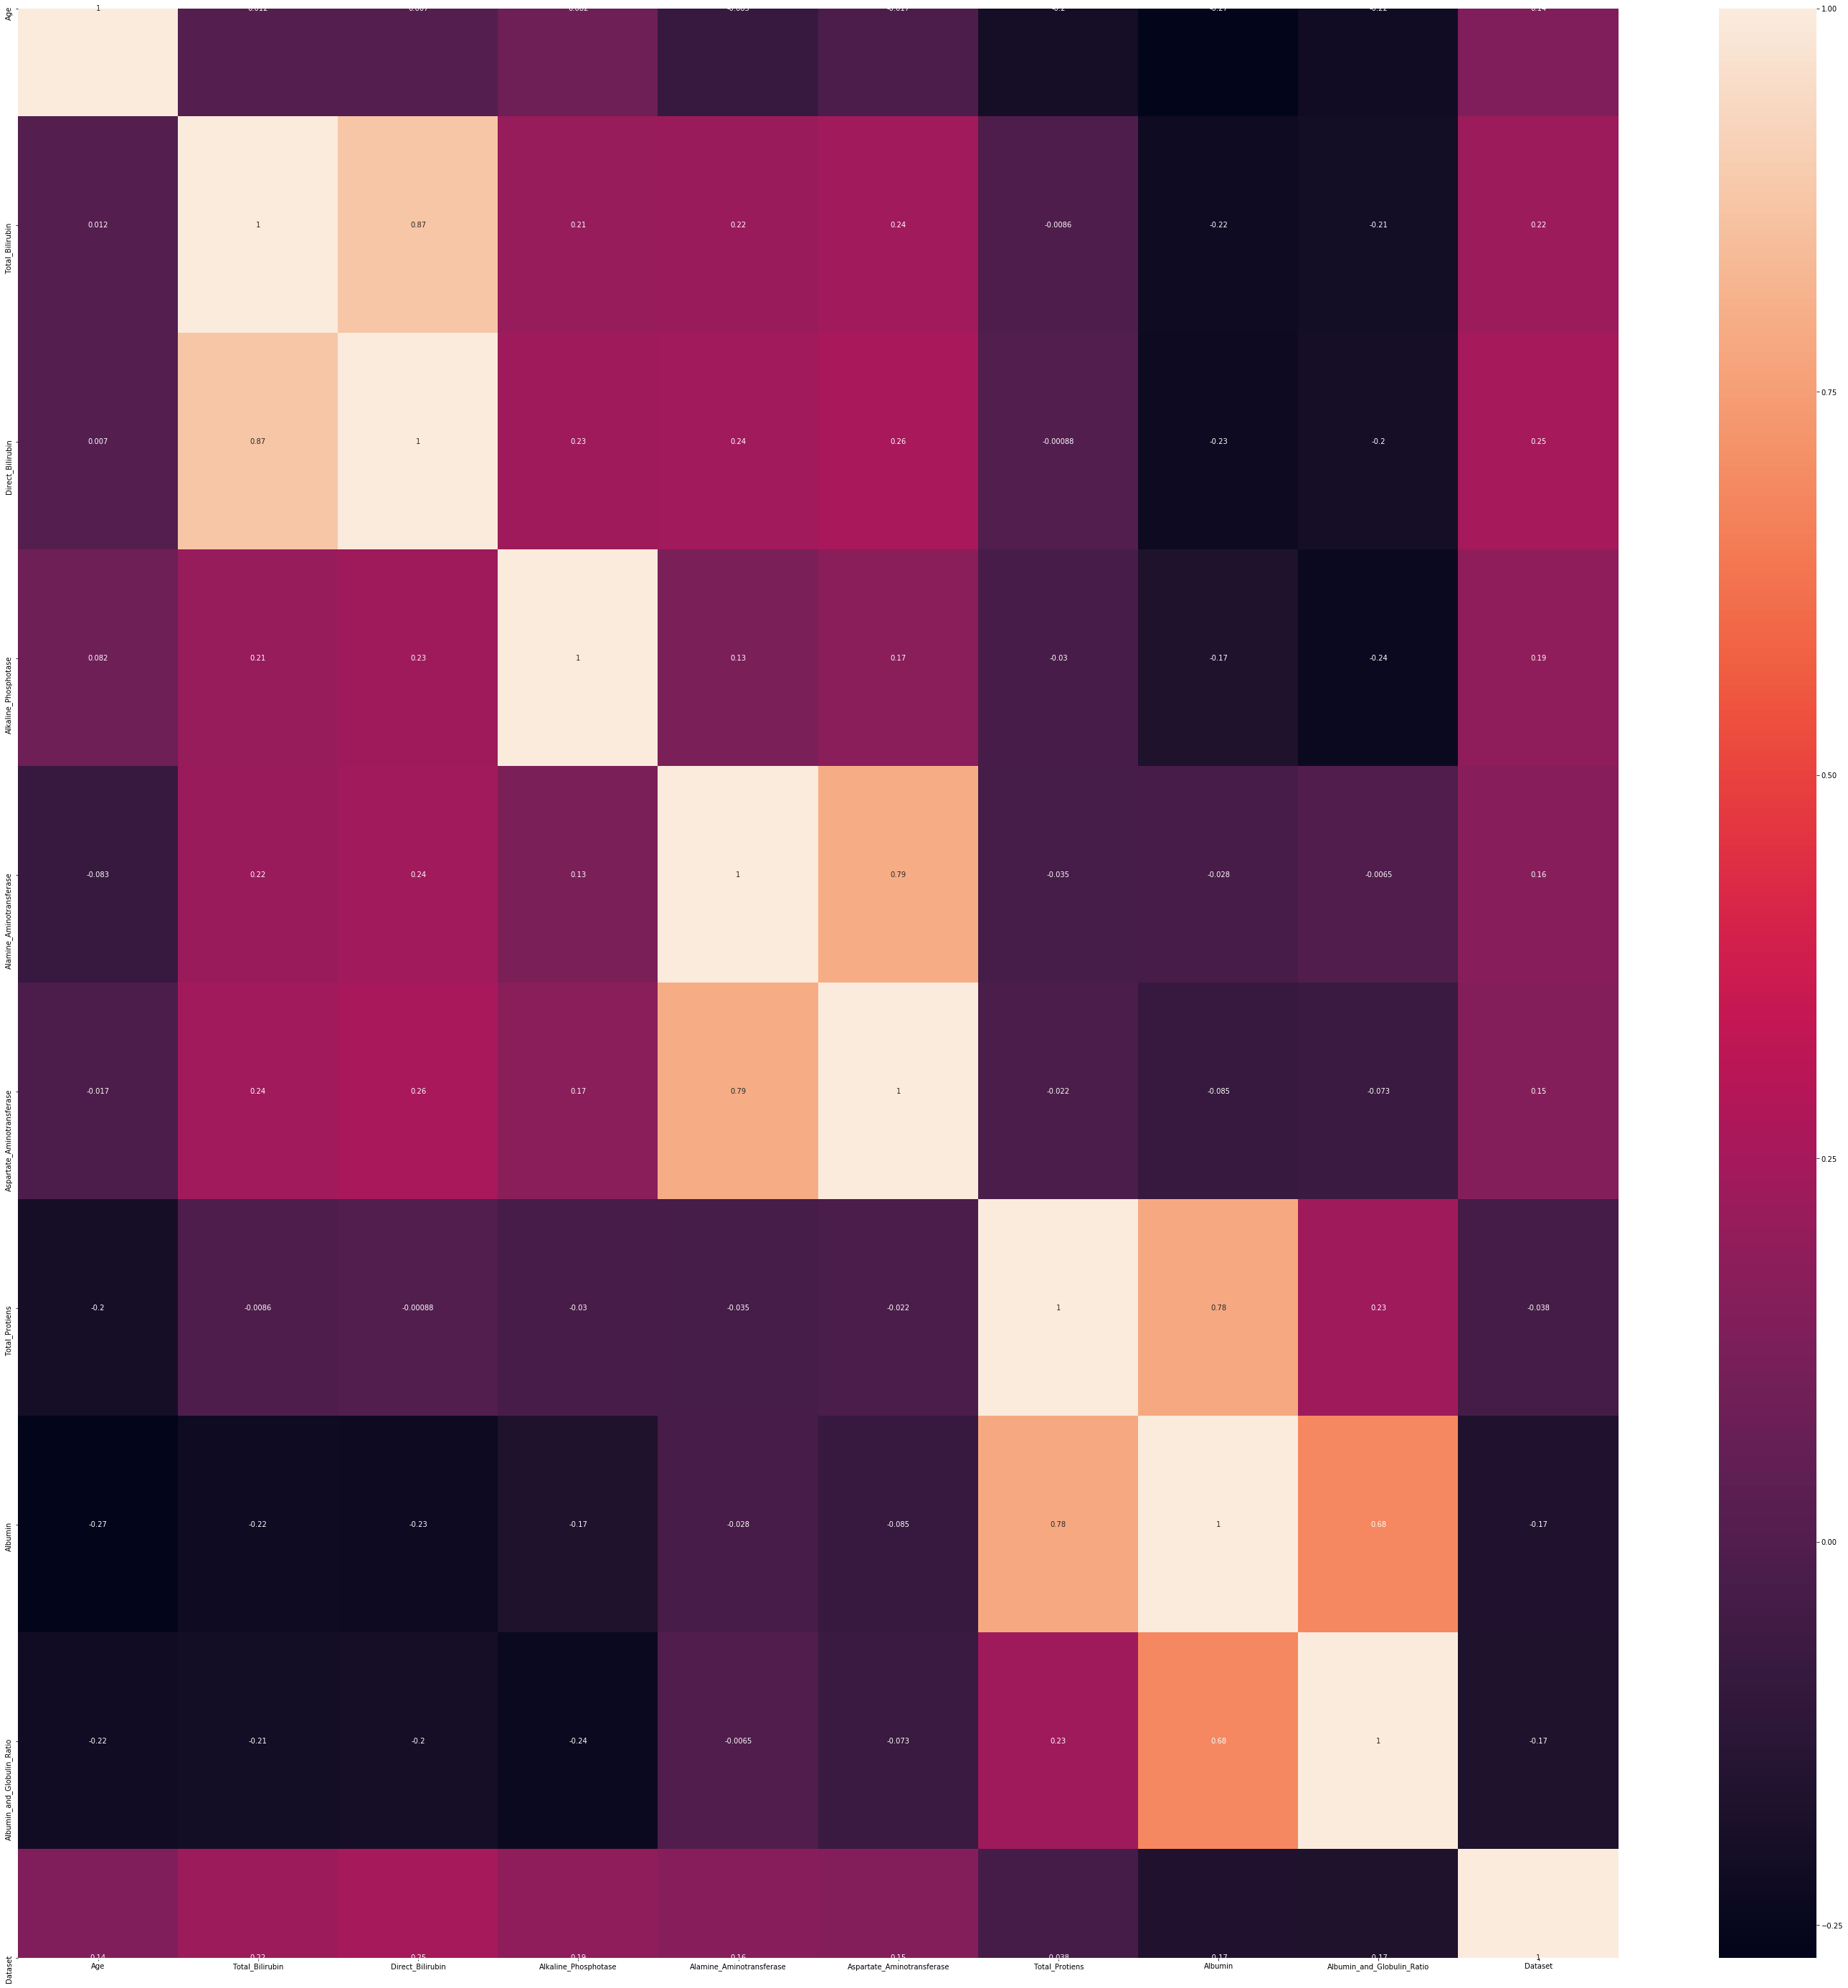

In [20]:
######## Check feature correlation #########

plt.figure(figsize=(50,50))
snplot = sns.heatmap(df_final_data_1.corr(), annot=True)
plt.show()
snplot.get_figure().savefig('TransformedFeaturesPearsonCorrelation.pdf')

In [21]:
df_final_data.describe() 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.947997
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.318510
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.947064
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


#  Filter analysis as below from the above plot 

1) The target variable has substantial coorelation with other columns excep the Total_proteins columns

2) Albumin and Albumin_and_Globulin_Ratio have very high coorelation so one column can be dropped . Both have same relationship with target varible hence will randomly pick Albumin and drop it 

3) Alamine_Aminotransferase and Aspartate_Aminotransferase  have very high coorelation so one column can be dropped. Alamine_Aminotransferase has a slightly higher coorelation with target variable hence will drop Aspartate_Aminotransferase

4) Direct_Bilirubin and Total_Bilirubin have very high coorelation so one column can be dropped. Direct bilirubin has a higher coorelation with Target variable hence will drop Total_Bilirubin

5) Total_proteins and Albumin have have very high coorelation so one column can be dropped . Will go with Total_protein since it has very low coorelation with the target variable

# <font color=Red>(D)FEATURE ENGINEERING & MODEL BUILDINGAND DIAGNOSTICS </font>

<font color=green>FEATURE ENGINEERING IS AN IMPORTANT STEP TO DEVELOP AND IMPROVE PERFORMANCE OF MACHINE LEARNING MODELS. THESE TECHNIQUES CAN ALSO BE USED TO IDENTIFY THE VARIABLES THAT IMPACTS THE OUTCOME OF THE MODEL. ITS BASICALLY PROCESS OF IDENTIFYING AND EXTRACTING THE USEFUL FEATURES FROM THE AVAILABLE DATA. THE PRIMARY GOAL IS TO DERIVE A SET OF FEATURES THAT BEST REPRESENT THE INSIGHTS HIDDEN IN THE DATA, WITH A SIMPLER MODEL THAT GENERALIZES WELL TO FUTURE (UNKNOWN) OBSERVATIONS.
</font>


MODEL BUILDINGAND DIAGNOSTICS:-


IN THIS STAGE FIRST DATA IS DIVIDED INTO TRAIN AND TEST DATA. THE SUBSET CAN ALSO BE CREATED USING RANDOM / STRATIFIED SAMPLING PROCEDURE. THIS IS IMPORTANT STEP TO MEASEURE THE PERFORMANCE OF MODEL USING DATASET NOT USED IN MODEL BUILDING. IT IS ALSO ESSENTIAL TO CHECK FOR ANY OVERFITTING OF THE MODEL. THEN MODEL IS BUILT USING TRAINING DATASET TO ESTIMATE THE MODEL PARAMETERS. THE METHOD OF CLASSIFICATIONS CAN BE UTILIZED FOR THE SAME.





In [22]:
# find and remove correlated features with a given threshold
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df_final_data_1.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [23]:
correlation(df_final_data.iloc[:,:-1],0.8) 

{'Direct_Bilirubin'}

# <font color=Red>From the above we can determine that Direct bilirubin has a very high coorelation above the threshold of 0.8 with one other column which is in alignment with the Filter analysis done above . So we will pick up the columns as mentioned in the filter analysis for the feature engineering output </font>

In [24]:
df_final_data_1

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,1.241741,-0.418647,-0.493702,-0.427421,-0.351482,-0.314428,0.279290,0.189737,-0.150824,1
1,1.056874,1.210111,1.413923,1.661722,-0.086746,-0.032278,0.923059,0.064127,-0.653605,1
2,1.056874,0.635255,0.919354,0.808927,-0.108807,-0.142385,0.463224,0.189737,-0.182248,1
3,0.810385,-0.370743,-0.387723,-0.447823,-0.362513,-0.307546,0.279290,0.315348,0.163413,1
4,1.673096,0.092336,0.177500,-0.394778,-0.290813,-0.173353,0.739125,-0.940754,-1.722013,1
...,...,...,...,...,...,...,...,...,...,...
578,0.933630,-0.450584,-0.493702,0.849731,-0.329421,-0.259374,-0.548414,-1.945636,-1.816284,0
579,-0.298813,-0.434616,-0.493702,-0.790573,-0.246691,-0.269697,-0.456447,0.064127,0.477651,1
580,0.440653,-0.402679,-0.458375,-0.190760,-0.174991,-0.207761,-0.088579,0.064127,0.163413,1
581,-0.853413,-0.322838,-0.352396,-0.439662,-0.279783,-0.266256,0.279290,0.315348,0.163413,1


In [25]:
# Create accuracy score & model dict arrays to draw graph later #
accscore_arr = []
aucscore_arr = []
accscore_model = []


# seperate X,Z and y variables
y = df_final_data_1['Dataset']
X = df_final_data_1.drop(['Dataset'],axis=1)

X=np.array(X)
y=np.array(y)
X.shape

(570, 9)

# # accuracy  measure with all the  features for Naive Bayes and Logistic Regression.

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

accuracy score for logistic regression with all features: 
 [[14 35]
 [11 83]]
accuracy score =  67.83 %


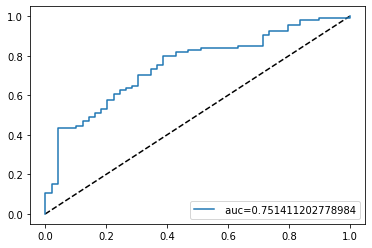

In [27]:
# fit logistic regression to the training set 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
#Create Logistic regression Classifier
logreg = LogisticRegression()

#Train the model using the training sets
logreg.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
accscore_arr.append(acc_score)
accscore_model.append('All Features Logistic')
print("accuracy score for logistic regression with all features: \n",confusion_matrix)
print ("accuracy score = ",round(acc_score*100,2),"%")

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
#y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

accuracy score for gaussian naive bayes with all features: 
 [[47  2]
 [57 37]]
accuracy score =  58.74 %


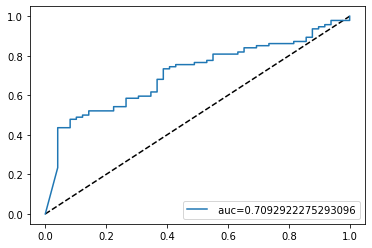

In [28]:
# fit Gaussian Naive Bayes to the training set 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
#Create Gaussian Naive Bayes regression Classifier
gaussNB = GaussianNB()

#Train the model using the training sets
gaussNB.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gaussNB.predict(X_test)
y_pred_prob = gaussNB.predict_proba(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
accscore_arr.append(acc_score)
accscore_model.append('All Features Gaussian')
print("accuracy score for gaussian naive bayes with all features: \n",confusion_matrix)
print ("accuracy score = ",round(acc_score*100,2),"%")

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
#y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

# accuracy measure with all the selected features from filter analysis for Naive Bayes and Logistic Regression

In [29]:

from sklearn.model_selection import train_test_split
tmp_df = df_final_data_1.loc[:, ['Age' ,'Albumin_and_Globulin_Ratio' , 'Alamine_Aminotransferase' , 'Direct_Bilirubin' ]]
tmp_df=np.array(tmp_df)
X_train, X_test, y_train, y_test = train_test_split(tmp_df, y, test_size = 0.25, random_state = 0)

accuracy score for logistic regression with all features: 
 [[10 39]
 [ 3 91]]
accuracy score =  70.63 %


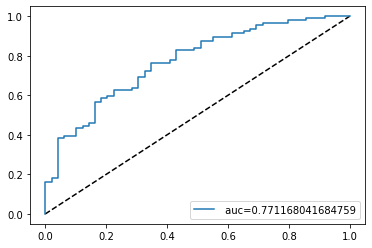

In [30]:
# fit logistic regression to the training set 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
#Create Logistic regression Classifier
logreg = LogisticRegression()

#Train the model using the training sets
logreg.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
accscore_arr.append(acc_score)
accscore_model.append('Selected Features Logistic')
print("accuracy score for logistic regression with all features: \n",confusion_matrix)
print ("accuracy score = ",round(acc_score*100,2),"%")

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
#y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

accuracy score for gaussian naive bayes with all features: 
 [[47  2]
 [58 36]]
accuracy score =  58.04 %


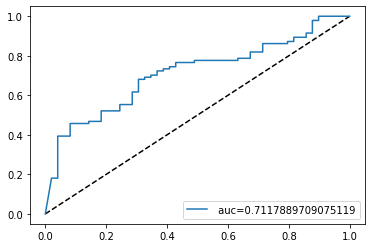

In [31]:
# fit Gaussian Naive Bayes to the training set 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
#Create Gaussian Naive Bayes regression Classifier
gaussNB = GaussianNB()

#Train the model using the training sets
gaussNB.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gaussNB.predict(X_test)
y_pred_prob = gaussNB.predict_proba(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
accscore_arr.append(acc_score)
accscore_model.append('Selected Features Gaussian')

print("accuracy score for gaussian naive bayes with all features: \n",confusion_matrix)
print ("accuracy score = ",round(acc_score*100,2),"%")

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
#y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

# analysis with Forward Feature Selection for Naive Bayes and Logistic Regression

In [32]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Most important features as per forward selection:

    feature_idx             cv_scores avg_score  \
1          (0,)   [0.712280701754386]  0.712281   
2        (0, 4)  [0.7315789473684211]  0.731579   
3     (0, 4, 5)  [0.7333333333333333]  0.733333   
4  (0, 4, 5, 6)  [0.7333333333333333]  0.733333   

                                       feature_names  
1                                             (Age,)  
2                    (Age, Alamine_Aminotransferase)  
3  (Age, Alamine_Aminotransferase, Aspartate_Amin...  
4  (Age, Alamine_Aminotransferase, Aspartate_Amin...  
Accuracy of logistic classifier on test set using forward feature elimination: 69.93 %
confusion matrix
 [[ 7 42]
 [ 1 93]]


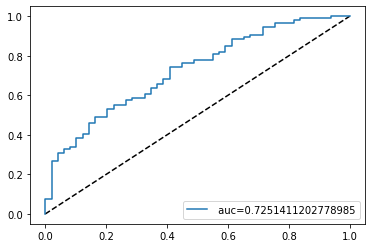

In [33]:
#######################################################################################################
#                  Forward Feature Selection Method & Logistic regression Model                       #
#######################################################################################################

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

df_load_features_for_ForwardFeature = df_final_data_2.copy()
df_load_Outcome = df_final_data_2.loc[:, ['Dataset']] #Store Outcome as Y 
df_load_features_for_ForwardFeature.drop("Dataset", axis = 1, inplace=True) #Outcome is not required

#Define Sequential Forward Selection (sfs)
sfs = SFS( LogisticRegression(),
           k_features=4,
           forward=True,
           floating=False,
           scoring = 'accuracy',
           cv = 0)


#Use SFS to select the top 5 features 
sfs.fit(df_load_features_for_ForwardFeature, df_load_Outcome)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
print("Most important features as per forward selection:\n")
print(df_SFS_results)
feat_cols = list(sfs.k_feature_idx_)


df_load_features_for_ForwardFeature = np.array(df_load_features_for_ForwardFeature)
df_load_Outcome = np.array(df_load_Outcome)
xTrain, xTest, yTrain, yTest = train_test_split(df_load_features_for_ForwardFeature, 
                                                df_load_Outcome.reshape(df_load_Outcome.shape[0],)
                                                , test_size = 0.25, random_state = 0) #split the datasset into train and validation
logreg = LogisticRegression()
logreg.fit(xTrain[:,feat_cols], yTrain) #selecting top 4 features identified by forward selection
y_pred = logreg.predict(xTest[:,feat_cols])
y_pred_prob = logreg.predict_proba(xTest[:,feat_cols])
acc_score = accuracy_score(y_test, y_pred)
accscore_arr.append(acc_score)
accscore_model.append('Forward Features Logistic')
print('Accuracy of logistic classifier on test set using forward feature elimination: {:.2f} %'.format(round(acc_score*100,2)))

confusion_matrix = confusion_matrix(yTest, y_pred)
print("confusion matrix\n",confusion_matrix)

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
#y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Most important features as per forward selection:

    feature_idx             cv_scores avg_score  \
1          (0,)  [0.7140350877192982]  0.714035   
2        (0, 8)  [0.7175438596491228]  0.717544   
3     (0, 6, 8)  [0.7105263157894737]  0.710526   
4  (0, 6, 7, 8)  [0.6982456140350877]  0.698246   

                                       feature_names  
1                                             (Age,)  
2                  (Age, Albumin_and_Globulin_Ratio)  
3  (Age, Total_Protiens, Albumin_and_Globulin_Ratio)  
4  (Age, Total_Protiens, Albumin, Albumin_and_Glo...  
Accuracy of Gaussian NB classifier on test set using forward feature elimination: 66.43 %
confusion matrix
 [[ 9 40]
 [ 8 86]]


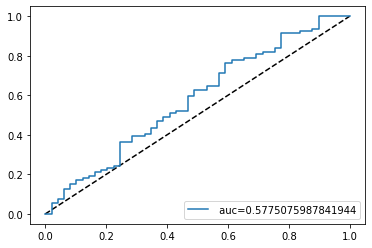

In [35]:
#######################################################################################################
#                         Forward Feature Selection Method & GaussianNB Model                         #
#######################################################################################################

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

df_load_features_for_ForwardFeature = df_final_data_2.copy()
df_load_Outcome = df_final_data_2.loc[:, ['Dataset']] #Store Outcome as Y 
df_load_features_for_ForwardFeature.drop("Dataset", axis = 1, inplace=True) #Outcome is not required

#Define Sequential Forward Selection (sfs)
sfs = SFS( GaussianNB(),
           k_features=4,
           forward=True,
           floating=False,
           scoring = 'accuracy',
           cv = 0)


#Use SFS to select the top 5 features 
sfs.fit(df_load_features_for_ForwardFeature, df_load_Outcome)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
print("Most important features as per forward selection:\n")
print(df_SFS_results)
feat_cols = list(sfs.k_feature_idx_)


df_load_features_for_ForwardFeature = np.array(df_load_features_for_ForwardFeature)
df_load_Outcome = np.array(df_load_Outcome)
xTrain, xTest, yTrain, yTest = train_test_split(df_load_features_for_ForwardFeature, 
                                                df_load_Outcome.reshape(df_load_Outcome.shape[0],)
                                                , test_size = 0.25, random_state = 0) #split the datasset into train and validation
gaussNB = GaussianNB()
gaussNB.fit(xTrain[:,feat_cols], yTrain) #selecting top 4 features identified by forward selection
y_pred = gaussNB.predict(xTest[:,feat_cols])
y_pred_prob = gaussNB.predict_proba(xTest[:,feat_cols])
acc_score = accuracy_score(y_test, y_pred)
accscore_arr.append(acc_score)
accscore_model.append('Forward Features Gaussian')
print('Accuracy of Gaussian NB classifier on test set using forward feature elimination: {:.2f} %'.format(round(acc_score*100,2)))

confusion_matrix = confusion_matrix(yTest, y_pred)
print("confusion matrix\n",confusion_matrix)

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
#y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

# HyperParameter tuning for Naive Bayes and Logistic Regression to check if this gives better accuracy 

In [36]:
# importing RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Best Hyperparameters: {'penalty': 'l2'}
accuracy score for logistic regression with all hyperparameter tunings 
 [[14 35]
 [11 83]]
accuracy score =  67.83 %


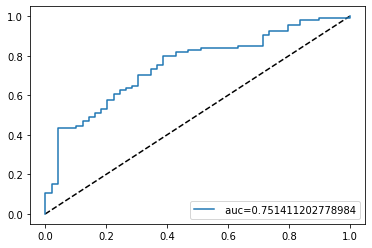

In [37]:
# fit logistic regression to the training set 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
#Create Logistic regression Classifier
logreg = LogisticRegression()

#grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
#grid_values = {'penalty': ['l1', 'l2']}
# define search space
space = dict()
#space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
#space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
grid_clf_acc = GridSearchCV(logreg, space,scoring = 'accuracy' ,cv=cv,n_jobs=-1)


#Train the model using the training sets
result = grid_clf_acc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = grid_clf_acc.predict(X_test)
y_pred_prob = grid_clf_acc.predict_proba(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
accscore_arr.append(acc_score)
accscore_model.append('Hyper Parameter tuned Logistic')

print('Best Hyperparameters: %s' % result.best_params_)
print("accuracy score for logistic regression with all hyperparameter tunings \n",confusion_matrix)
print ("accuracy score = ",round(acc_score*100,2),"%")

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
#y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

Best Hyperparameters: {'var_smoothing': 2.848035868435799e-05}
accuracy score for Gaussian NB with all hyperparameter tunings 
 [[47  2]
 [57 37]]
accuracy score =  58.74 %


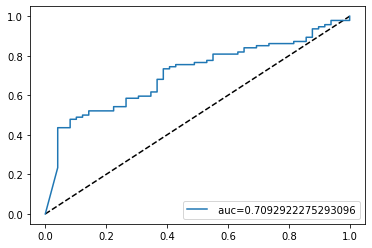

In [38]:
# fit Gaussian Naive Bayes to the training set 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
#Create Gaussian Naive Bayes regression Classifier
gaussNB = GaussianNB()

#grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
#grid_values = {'penalty': ['l1', 'l2']}

# define search space
space = dict()
space['var_smoothing'] = np.logspace(0,-9, num=100)

grid_clf_acc = GridSearchCV(gaussNB, space,scoring = 'accuracy' ,cv=cv,n_jobs=-1)


#Train the model using the training sets
result = grid_clf_acc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = grid_clf_acc.predict(X_test)
y_pred_prob = grid_clf_acc.predict_proba(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
accscore_arr.append(acc_score)
accscore_model.append('Hyper Parameter tuned Gaussian')

print('Best Hyperparameters: %s' % result.best_params_)
print("accuracy score for Gaussian NB with all hyperparameter tunings \n",confusion_matrix)
print ("accuracy score = ",round(acc_score*100,2),"%")

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

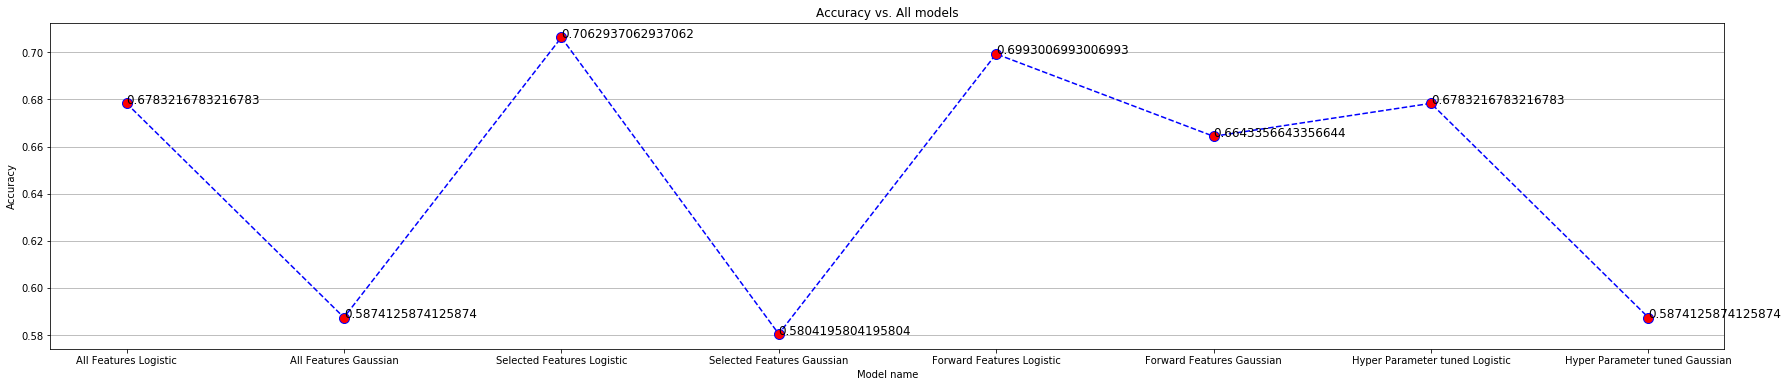

In [39]:
######################### Drawing the best accuracy graph for all the models ###########################

plt.figure(figsize=(30,6))

plt.title('Accuracy vs. All models')
plt.xlabel('Model name')
plt.ylabel('Accuracy')
for i,j in zip(accscore_model,accscore_arr):
    inplot = plt.annotate(str(j)
                          ,xy=(i,j)
                          ,fontsize=12
                          ,color='black')
plt.grid(axis='y', linestyle='-')
plt.plot(accscore_model,accscore_arr,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

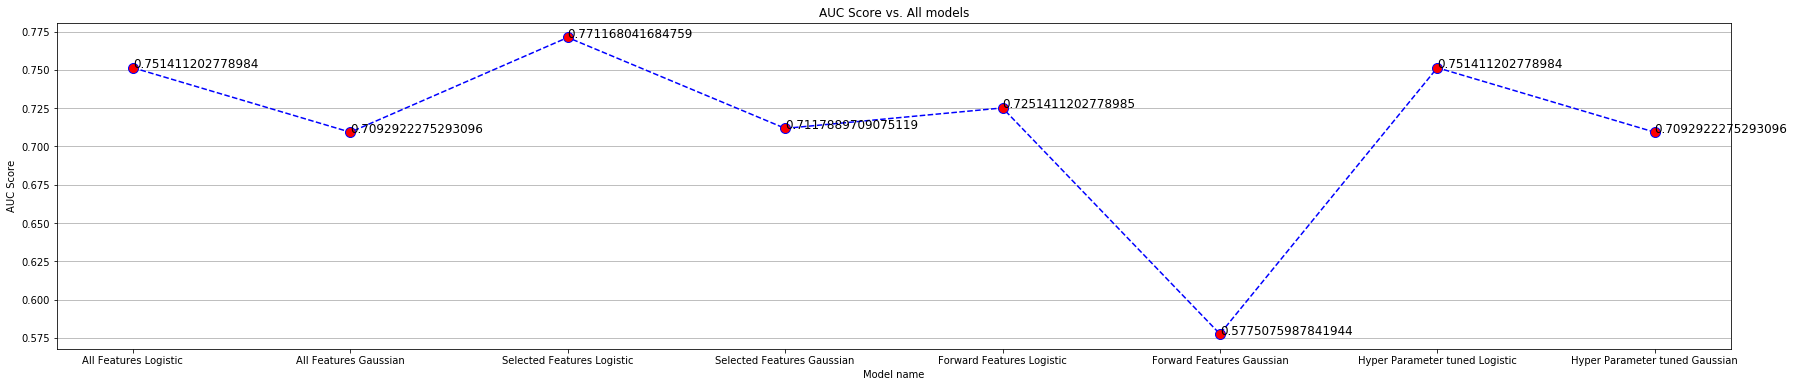

In [40]:
######################### Drawing the best AUC graph for all the models ###########################

plt.figure(figsize=(30,6))

plt.title('AUC Score vs. All models')
plt.xlabel('Model name')
plt.ylabel('AUC Score')
for i,j in zip(accscore_model,aucscore_arr):
    inplot = plt.annotate(str(j)
                          ,xy=(i,j)
                          ,fontsize=12
                          ,color='black')
plt.grid(axis='y', linestyle='-')
plt.plot(accscore_model,aucscore_arr,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# <font color=Red>From the above we can determine that best accuracy is obtained  for filter method based selcted features for logistic regression  , and if we look at AUC then the best AUC is also obtained for the same . For this problem , from the data we can see that No values for target variable are rare hence more valuable so accuracy wont be the right measure rather AUC should be the right measure ,hence we are going to apply hyper parameter tuning to the filter method based selcted features for logistic regression and select it as the best model </font>

# Best Model - HyperParameter tuning for filter method based selected features for logistic regression

In [41]:
# importing RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
tmp_df = df_final_data_1.loc[:, ['Age' ,'Albumin_and_Globulin_Ratio' , 'Alamine_Aminotransferase' , 'Direct_Bilirubin' ]]
tmp_df=np.array(tmp_df)
X_train, X_test, y_train, y_test = train_test_split(tmp_df, y, test_size = 0.25, random_state = 0)

Best Hyperparameters: {'penalty': 'l2'}
accuracy score for logistic regression with all hyperparameter tunings & selected features from filter method 
 [[10 39]
 [ 3 91]]
accuracy score =  70.63 %


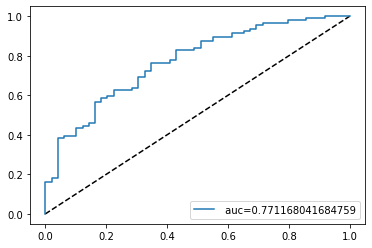

In [42]:
# fit logistic regression to the training set 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
#Create Logistic regression Classifier
logreg = LogisticRegression()

#grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
#grid_values = {'penalty': ['l1', 'l2']}
# define search space
space = dict()
#space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
#space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
grid_clf_acc = GridSearchCV(logreg, space,scoring = 'accuracy' ,cv=cv,n_jobs=-1)


#Train the model using the training sets
result = grid_clf_acc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = grid_clf_acc.predict(X_test)
y_pred_prob = grid_clf_acc.predict_proba(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
accscore_arr.append(acc_score)
accscore_model.append('Hyper Parameter tuned Logistic')

print('Best Hyperparameters: %s' % result.best_params_)
print("accuracy score for logistic regression with all hyperparameter tunings & selected features from filter method \n",confusion_matrix)
print ("accuracy score = ",round(acc_score*100,2),"%")

########## Drawing the AUC curves ###########
y_pred_proba = y_pred_prob[:,1]
#y_pred_proba = y_pred
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
aucscore_arr.append(auc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [43]:
endTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
print ("Run started at : ",startTime)
print ("Run ended at : ",endTime)

Run started at :  Sat, 20 Feb 2021 17:47:32 +0000
Run ended at :  Sat, 20 Feb 2021 17:48:04 +0000


<font color="Red" size=5> Conclusion - We selected the HyperParameter tuned for filter method based selected features for logistic regression as the best model and it gives an accuracy of 70.63% but an AUC of 0.77 </font>